# Importing neccessary libraries

Here I used default libraries for data manipulationa and mathematical operation(pandas and numpy, correspondingly). Afterwards I set up Tensorflow backend and imported keras for deep learning.

In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from PIL import Image

# Data with 32x32 shape

At first, I tried to make deep learning with 32x32 images, because you do not need any reshaping. <br>
Below is load_data function for this type of data.

In [2]:
def load_data(filename):
    data = pd.read_csv(filename, delimiter = "#")
    data['Data'] = data['Data'].apply(lambda x: list(x))
    for i, j in enumerate(data['Data']):
        test_list = np.array(list(map(int, j)))
        data.at[i, 'Data'] = test_list
        data.at[i, 'Data'] = np.asarray(data.at[i, 'Data'].reshape(data.at[i, 'SizeH'], data.at[i, 'SizeW'])).astype('float32')
    return data

(4200, 6)


,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,0,0,9,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


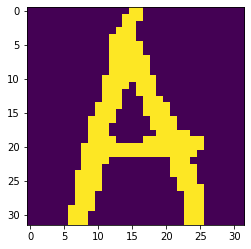

In [3]:
data_train = load_data('HandChars32_150_Train.txt')
print(data_train.shape)
plt.imshow(data_train.loc[0, 'Data'])
data_train.head()

(1400, 6)


,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,0,0,10,32,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


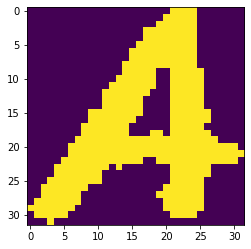

In [4]:
data_test = load_data('HandChars32_50_Test.txt')
print(data_test.shape)
plt.imshow(data_test.loc[0, 'Data'])
data_test.head()

# Reshaping of arrays for CNN

Here I had a problem with shape after receiving data from dataframe, so constructed helper function for reshaping

In [5]:
def reshaper(arr):
    out = np.array([])
    for i in arr:
        out = np.append(out, i)
    return out.reshape(arr.shape[0], arr[0].shape[0], arr[0].shape[1], 1)

In [6]:
x_train = reshaper(data_train['Data'])
x_test = reshaper(data_test['Data'])
y_train = data_train['PatN']
y_test = data_test['PatN']

num_classes = len(data_train.loc[:,'PatN'].unique())
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(4200, 28)


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 32, 32, 1)
(1400, 32, 32, 1)
(4200, 28)
(1400, 28)


Constructing our CNN model with  3 convolutional layer, 1 pooling and adding dropout for making our model more robust to overfitting.

In [8]:
model_1 = Sequential()
inp_shape = (32, 32, 1)
## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=inp_shape))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          2

In [9]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
132/132 [==============================] - 5s 37ms/step - loss: 2.1116 - accuracy: 0.3781 - val_loss: 1.5671 - val_accuracy: 0.5514
Epoch 2/15
132/132 [==============================] - 5s 35ms/step - loss: 0.9913 - accuracy: 0.6912 - val_loss: 1.2899 - val_accuracy: 0.6564
Epoch 3/15
132/132 [==============================] - 5s 36ms/step - loss: 0.6846 - accuracy: 0.7843 - val_loss: 1.2052 - val_accuracy: 0.6929
Epoch 4/15
132/132 [==============================] - 5s 36ms/step - loss: 0.5272 - accuracy: 0.8371 - val_loss: 0.9142 - val_accuracy: 0.7464
Epoch 5/15
132/132 [==============================] - 5s 36ms/step - loss: 0.3991 - accuracy: 0.8714 - val_loss: 0.9169 - val_accuracy: 0.7686
Epoch 6/15
132/132 [==============================] - 5s 39ms/step - loss: 0.3305 - accuracy: 0.8969 - val_loss: 1.1132 - val_accuracy: 0.7400
Epoch 7/15
132/132 [==============================] - 5s 38ms/step - loss: 0.2636 - accuracy: 0.9162 - val_loss: 0.8888 - val_accuracy: 0.7950

The layer for Fully connected Neural Network can take only one dimensional array, so I reshaped my data for feeding it to model 

In [10]:
y_train_fully = data_train['PatN']
y_test_fully = data_test['PatN']
x_train_fully = data_train['Data']
x_test_fully = data_test['Data']

In [11]:
print(x_train_fully.shape)
print(x_test_fully.shape)
print(y_train_fully.shape)
print(y_test_fully.shape)

(4200,)
(1400,)
(4200,)
(1400,)


In [12]:
def transf(arr):
    out = np.array([])
    for i in arr:
        out = np.append(out, i)
    return out.reshape(arr.shape[0], arr[0].shape[0] * arr[0].shape[1])
x_train_fully = transf(data_train['Data'])
x_test_fully = transf(data_test['Data'])
y_train_fully = keras.utils.to_categorical(y_train_fully, num_classes)
y_test_fully = keras.utils.to_categorical(y_test_fully, num_classes)

In [13]:
print(x_train_fully.shape)

(4200, 1024)


In [14]:
print(x_test_fully.shape)

(1400, 1024)


In [15]:
print(y_train_fully.shape)
print(y_test_fully.shape)

(4200, 28)
(1400, 28)


Fully connected Neural Network

In [16]:
model_2 = Sequential()
model_2.add(Dense(1024, input_shape=(1024,), activation="relu"))
model_2.add(Dense(1024,  activation="relu"))
model_2.add(Dense(1024,  activation="relu"))
model_2.add(Dense(28, activation="softmax"))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 28)                28700     
Total params: 3,177,500
Trainable params: 3,177,500
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_2.compile(SGD(lr = .003), "categorical_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(x_train_fully, y_train_fully, validation_data=(x_test_fully, y_test_fully), epochs=50)

Epoch 1/50
132/132 [==============================] - 3s 19ms/step - loss: 3.2912 - accuracy: 0.0781 - val_loss: 3.2719 - val_accuracy: 0.0893
Epoch 2/50
132/132 [==============================] - 2s 19ms/step - loss: 3.1664 - accuracy: 0.2221 - val_loss: 3.1779 - val_accuracy: 0.1421
Epoch 3/50
132/132 [==============================] - 2s 18ms/step - loss: 3.0275 - accuracy: 0.3690 - val_loss: 3.0637 - val_accuracy: 0.1950
Epoch 4/50
132/132 [==============================] - 2s 19ms/step - loss: 2.8522 - accuracy: 0.4881 - val_loss: 2.9250 - val_accuracy: 0.2336
Epoch 5/50
132/132 [==============================] - 2s 18ms/step - loss: 2.6256 - accuracy: 0.5783 - val_loss: 2.7379 - val_accuracy: 0.3121
Epoch 6/50
132/132 [==============================] - 2s 19ms/step - loss: 2.3452 - accuracy: 0.6619 - val_loss: 2.5197 - val_accuracy: 0.3614
Epoch 7/50
132/132 [==============================] - 3s 20ms/step - loss: 2.0289 - accuracy: 0.7000 - val_loss: 2.3332 - val_accuracy: 0.3864

As we see, with Convolutional layers, model have more validation_accuracy, than default fully connected neural net. Also CNN is faster in training than Fully connected, due to less number of parameters in model(Check model.summary() sections).
Also the fully connected neural net with the same number of parameters will have less power in terms of prediction.

# Data with Feature Extraction

Here I found that data are in (256, 1) shape, so i decided to reshape it to (16, 16, 1) for feeding to CNN.

In [18]:
def load_data_feature(filename):
    data = pd.read_csv(filename, delimiter = "#")
    for i, j in enumerate(data['Data']):
        j = j.replace(',', '.').split(';')
        j = np.array(list(map(float, j)))
        data.at[i, 'Data'] = j
        data.at[i, 'Data'] = np.asarray(data.at[i, 'Data'].reshape(16, 16, 1)).astype('float32')
    return data

In [19]:
train_data_feat = load_data_feature("HandChars_FeatExt_PDC4428_150_Train.txt")
test_data_feat = load_data_feature("HandChars_FeatExt_PDC4428_50_Test.txt")

In [20]:
train_data_feat.shape

(4200, 6)

In [21]:
train_data_feat.at[0, 'Data'].shape

(16, 16, 1)

In [22]:
x_train_feat = reshaper(train_data_feat['Data'])
x_test_feat = reshaper(test_data_feat['Data'])
y_train_feat = train_data_feat['PatN']
y_test_feat = test_data_feat['PatN']
print(x_train_feat.shape)

(4200, 16, 16, 1)


In [23]:
num_classes = len(data_train.loc[:,'PatN'].unique())
y_train_feat = keras.utils.to_categorical(y_train_feat, num_classes)
y_test_feat = keras.utils.to_categorical(y_test_feat, num_classes)
print(y_train_feat.shape)

(4200, 28)


The same CNN as previous one.

In [24]:
model_1_feat = Sequential()
inp_shape = (16, 16, 1)
## 5x5 convolution with 2x2 stride and 32 filters
model_1_feat.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=inp_shape))
model_1_feat.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1_feat.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1_feat.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1_feat.add(MaxPooling2D(pool_size=(2, 2)))
model_1_feat.add(Dropout(0.25))

model_1_feat.add(Conv2D(32, (5, 5), strides = (2,2), padding = 'same'))
model_1_feat.add(Activation('relu'))

## Flatten turns 3x3x32 into 288x1
model_1_feat.add(Flatten())
model_1_feat.add(Dense(512))
model_1_feat.add(Activation('relu'))
model_1_feat.add(Dropout(0.5))
model_1_feat.add(Dense(num_classes))
model_1_feat.add(Activation('softmax'))

model_1_feat.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 32)        832       
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_6 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 32)         

In [25]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1_feat.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1_feat.fit(x_train_feat, y_train_feat,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test_feat, y_test_feat),
              shuffle=True)

Epoch 1/15
132/132 [==============================] - 2s 12ms/step - loss: 2.2909 - accuracy: 0.3167 - val_loss: 1.6290 - val_accuracy: 0.4393
Epoch 2/15
132/132 [==============================] - 2s 12ms/step - loss: 0.9738 - accuracy: 0.6786 - val_loss: 1.2300 - val_accuracy: 0.6021
Epoch 3/15
132/132 [==============================] - 2s 12ms/step - loss: 0.6082 - accuracy: 0.7910 - val_loss: 1.0120 - val_accuracy: 0.7114
Epoch 4/15
132/132 [==============================] - 1s 11ms/step - loss: 0.4531 - accuracy: 0.8467 - val_loss: 0.9124 - val_accuracy: 0.7279
Epoch 5/15
132/132 [==============================] - 1s 11ms/step - loss: 0.3647 - accuracy: 0.8767 - val_loss: 0.9936 - val_accuracy: 0.7271
Epoch 6/15
132/132 [==============================] - 2s 12ms/step - loss: 0.3154 - accuracy: 0.8888 - val_loss: 0.9225 - val_accuracy: 0.7429
Epoch 7/15
132/132 [==============================] - 1s 11ms/step - loss: 0.2612 - accuracy: 0.9098 - val_loss: 0.7213 - val_accuracy: 0.8143

In [26]:
x_test_feat.shape

(1400, 16, 16, 1)

In [27]:
x_train_feat_fully = x_train_feat.reshape(4200, 256)
y_train_feat_fully = y_train_feat.reshape(4200, 28)
x_test_feat_fully = x_test_feat.reshape(1400, 256)
y_test_feat_fully = y_test_feat.reshape(1400, 28)

In [28]:
model_2_feat = Sequential()
model_2_feat.add(Dense(1024, input_shape=(256,), activation="relu"))
model_2_feat.add(Dense(1024,  activation="relu"))
model_2_feat.add(Dense(1024,  activation="relu"))
model_2_feat.add(Dense(28, activation="softmax"))

model_2_feat.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 28)                28700     
Total params: 2,391,068
Trainable params: 2,391,068
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2_feat.compile(SGD(lr = .003), "categorical_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2_feat.fit(x_train_feat_fully, y_train_feat_fully, validation_data=(x_test_feat_fully, y_test_feat_fully), epochs=50)

Epoch 1/50
132/132 [==============================] - 2s 18ms/step - loss: 1.2067 - accuracy: 0.6740 - val_loss: 1.2534 - val_accuracy: 0.6364
Epoch 2/50
132/132 [==============================] - 2s 16ms/step - loss: 0.3820 - accuracy: 0.8988 - val_loss: 0.9110 - val_accuracy: 0.7429
Epoch 3/50
132/132 [==============================] - 2s 16ms/step - loss: 0.2465 - accuracy: 0.9350 - val_loss: 0.7931 - val_accuracy: 0.7607
Epoch 4/50
132/132 [==============================] - 2s 17ms/step - loss: 0.1876 - accuracy: 0.9550 - val_loss: 0.8314 - val_accuracy: 0.7643
Epoch 5/50
132/132 [==============================] - 2s 16ms/step - loss: 0.1475 - accuracy: 0.9671 - val_loss: 0.8069 - val_accuracy: 0.7757
Epoch 6/50
132/132 [==============================] - 2s 17ms/step - loss: 0.1220 - accuracy: 0.9745 - val_loss: 0.7719 - val_accuracy: 0.7886
Epoch 7/50
132/132 [==============================] - 2s 16ms/step - loss: 0.1027 - accuracy: 0.9798 - val_loss: 0.8017 - val_accuracy: 0.7871

As we see the neural nets accuracy was exactly the same. I think that it is the effect of feature extraction.

# Data with unequeal height and width

In [30]:
def load_data_unequal(filename):
    data = pd.read_csv(filename, delimiter = "#")
    data['Data'] = data['Data'].apply(lambda x: list(x))
    for i, j in enumerate(data['Data']):
        test_list = np.array(list(map(int, j)))
        data.at[i, 'Data'] = test_list
        data.at[i, 'Data'] = np.asarray(data.at[i, 'Data'].reshape(data.at[i, 'SizeH'], data.at[i, 'SizeW'])).astype('float32')
    return data

In [31]:
train_uneq = load_data_unequal("HandChars_150_Train.txt")
test_uneq = load_data_unequal("HandChars_50_Test.txt")

In [32]:
for i, j in enumerate(train_uneq['Data']):
    img = Image.fromarray(j).resize(size=(32, 32))
    train_uneq.at[i, 'Data'] = np.array(img).reshape(32, 32, 1)
    
for i, j in enumerate(test_uneq['Data']):
    img = Image.fromarray(j).resize(size=(32, 32))
    test_uneq.at[i, 'Data'] = np.array(img).reshape(32, 32, 1)

In [33]:
train_uneq['Data'].shape

(4200,)

In [34]:
print(train_uneq.at[i, 'Data'].shape)
print(test_uneq.at[i, 'Data'].shape)

(32, 32, 1)
(32, 32, 1)


In [35]:
x_train_uneq = np.array(train_uneq['Data'].tolist())
y_train_uneq = np.array(train_uneq['PatN'].tolist())
x_test_uneq = np.array(test_uneq['Data'].tolist())
y_test_uneq = np.array(test_uneq['PatN'].tolist())

In [36]:
y_train_uneq = keras.utils.to_categorical(y_train_uneq, num_classes)
y_test_uneq = keras.utils.to_categorical(y_test_uneq, num_classes)

In [37]:
model_1_uneq = Sequential()
inp_shape = (32, 32, 1)
## 5x5 convolution with 2x2 stride and 32 filters
model_1_uneq.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=inp_shape))
model_1_uneq.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1_uneq.add(Conv2D(32, (5, 5), strides = (2,2) , padding = 'same'))
model_1_uneq.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1_uneq.add(MaxPooling2D(pool_size=(2, 2)))
model_1_uneq.add(Dropout(0.25))

model_1_uneq.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1_uneq.add(Activation('relu'))

## Flatten turns 3x3x32 into 288x1
model_1_uneq.add(Flatten())
model_1_uneq.add(Dense(512))
model_1_uneq.add(Activation('relu'))
model_1_uneq.add(Dropout(0.5))
model_1_uneq.add(Dense(num_classes))
model_1_uneq.add(Activation('softmax'))

model_1_uneq.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
activation_11 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 32)         

In [38]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1_uneq.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1_uneq.fit(x_train_uneq, y_train_uneq,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test_uneq, y_test_uneq),
              shuffle=True)

Epoch 1/15
132/132 [==============================] - 6s 44ms/step - loss: 2.0029 - accuracy: 0.4190 - val_loss: 1.1044 - val_accuracy: 0.7071
Epoch 2/15
132/132 [==============================] - 6s 42ms/step - loss: 0.9015 - accuracy: 0.7181 - val_loss: 0.8694 - val_accuracy: 0.7664
Epoch 3/15
132/132 [==============================] - 6s 44ms/step - loss: 0.5880 - accuracy: 0.8186 - val_loss: 0.7297 - val_accuracy: 0.8057
Epoch 4/15
132/132 [==============================] - 6s 44ms/step - loss: 0.4514 - accuracy: 0.8600 - val_loss: 0.6563 - val_accuracy: 0.8250
Epoch 5/15
132/132 [==============================] - 6s 44ms/step - loss: 0.3737 - accuracy: 0.8805 - val_loss: 0.6303 - val_accuracy: 0.8293
Epoch 6/15
132/132 [==============================] - 6s 44ms/step - loss: 0.2900 - accuracy: 0.9014 - val_loss: 0.6361 - val_accuracy: 0.8379
Epoch 7/15
132/132 [==============================] - 6s 43ms/step - loss: 0.2501 - accuracy: 0.9207 - val_loss: 0.6162 - val_accuracy: 0.8579

In [39]:
x_train_uneq_fully = x_train_uneq.reshape(4200, 1024)
y_train_uneq_fully = y_train_uneq.reshape(4200, 28)
x_test_uneq_fully = x_test_uneq.reshape(1400, 1024)
y_test_uneq_fully = y_test_uneq.reshape(1400, 28)

In [40]:
model_2_uneq = Sequential()
model_2_uneq.add(Dense(1024, input_shape=(1024,), activation="relu"))
model_2_uneq.add(Dense(1024,  activation="relu"))
model_2_uneq.add(Dense(1024,  activation="relu"))
model_2_uneq.add(Dense(28, activation="softmax"))

model_2_uneq.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 28)                28700     
Total params: 3,177,500
Trainable params: 3,177,500
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_2_uneq.compile(SGD(lr = .003), "categorical_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2_uneq.fit(x_train_uneq_fully, y_train_uneq_fully, validation_data=(x_test_uneq_fully, y_test_uneq_fully), epochs=50)

Epoch 1/50
132/132 [==============================] - 3s 21ms/step - loss: 3.2494 - accuracy: 0.0871 - val_loss: 3.1357 - val_accuracy: 0.2021
Epoch 2/50
132/132 [==============================] - 2s 19ms/step - loss: 2.9918 - accuracy: 0.3929 - val_loss: 2.8807 - val_accuracy: 0.4807
Epoch 3/50
132/132 [==============================] - 3s 19ms/step - loss: 2.6667 - accuracy: 0.6145 - val_loss: 2.5366 - val_accuracy: 0.5964
Epoch 4/50
132/132 [==============================] - 3s 20ms/step - loss: 2.2401 - accuracy: 0.7112 - val_loss: 2.1130 - val_accuracy: 0.6529
Epoch 5/50
132/132 [==============================] - 3s 20ms/step - loss: 1.7712 - accuracy: 0.7576 - val_loss: 1.7080 - val_accuracy: 0.6979
Epoch 6/50
132/132 [==============================] - 3s 19ms/step - loss: 1.3701 - accuracy: 0.8005 - val_loss: 1.4120 - val_accuracy: 0.7207
Epoch 7/50
132/132 [==============================] - 3s 19ms/step - loss: 1.0855 - accuracy: 0.8190 - val_loss: 1.2208 - val_accuracy: 0.7271

Here the model with CNN are more accurate than the fully connected model.

 # Final comparison

As we see from the models the best model is CNN model. This type of models is more specialized for images, although the fully connected prediction almost approached the CNN, this type of models required to many parameters for training. For this type of tasks(1 dimension of color channel) Fully connected neural nets is fast enough, but with RGB pictures it can take so much time for training model. Also, the performance of CNN can be increased, if we make this neural net deeper(i used simple version of CNN) and reach the number of parameters of Fully con. neural net.